<a href="https://colab.research.google.com/github/pacayton/Stat_268_Advanced_Time_Series_Analysis/blob/main/Stat_268_Week_3_4_Freq_Domain_Spectral_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stat 268: Advanced Time Series Analysis
$$\quad$$
#### Assoc Prof Peter Julian Cayton, PhD
#### School of Statistics
#### University of the Philippines Diliman
#### [Google Scholar](https://scholar.google.com/citations?user=KtH_mGEAAAAJ)

In [ ]:
## Preamble: Please install the following packages before running the codes

install.packages("TSA") ## TSAAR's package for data and functions
install.packages("fpp2") ## FPP2's package for data and functions
install.packages("tidyverse") ## for better data management

library(TSA)
library(fpp2)
library(tidyverse)

# Spectral Analysis

* also known as *frequency domain analysis*. (TSAAR)
* A field of time series analysis which involves methodologies to extract insights on the regular periodic behavior of the time series data.

Comment:
* Analyzing time series data through the autocorrelations is what we would call analyzing time series data on the *time domain*
* Analyzing the preiodic/frequency/wave patterns in time series data is what we would call analyzing the time series data on the *frequency domain*.


## Wave Equation / Periodic Process (TSAAR, TSDAAR)

Let's begin with the basic wave equation, such that for time $t \in \mathbb{R}$,

$$x_t = R \cos (2\pi  f  t +\Phi)$$

$R=$ the *amplitude* of the wave, i.e., the height of the function from the x-axis

$f=$ the *frequency* of the time series, meaning how many times a pattern is observed in 1 unit of time. $\frac{1}{f}$ is often described as the *period* of the time series, in which the curve would repeat every $\frac{1}{f}$ time units.

$\Phi =$ is the *phase* or *shift* in the wave, which just determines the starting point of the wave.

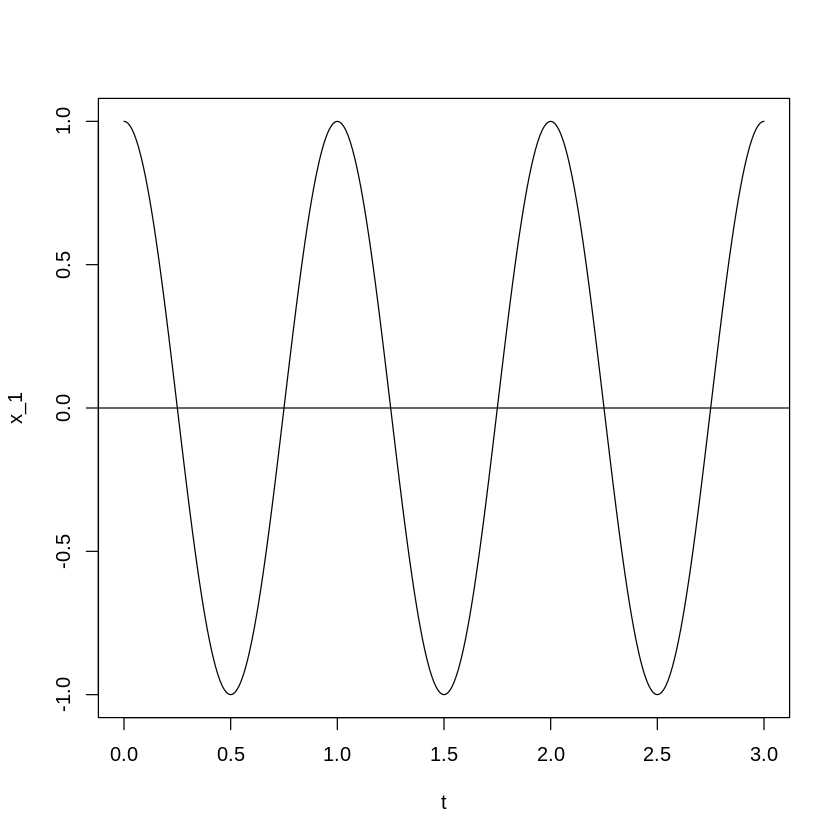

In [8]:
## Basic Parts of the Wave Equation

## setup the t vector

t <- seq(from = 0, to = 3 , by = 0.01 )

## Base parameter setup

R1 <- 1
f1 <- 1
Phi1 <- 0

x_1 <- R1 * cos(2*pi*f1 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
abline(h = 0)

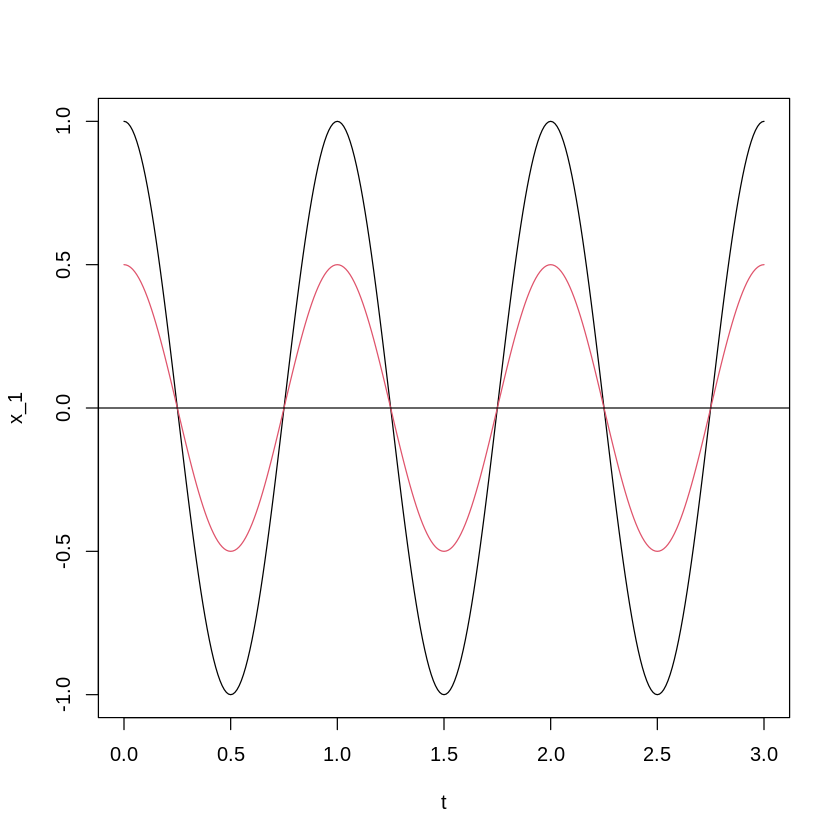

In [7]:
## Changing Amplitude

R2 <- 0.5
f1 <- 1
Phi1 <- 0

x_2 <- R2 * cos(2*pi*f1 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

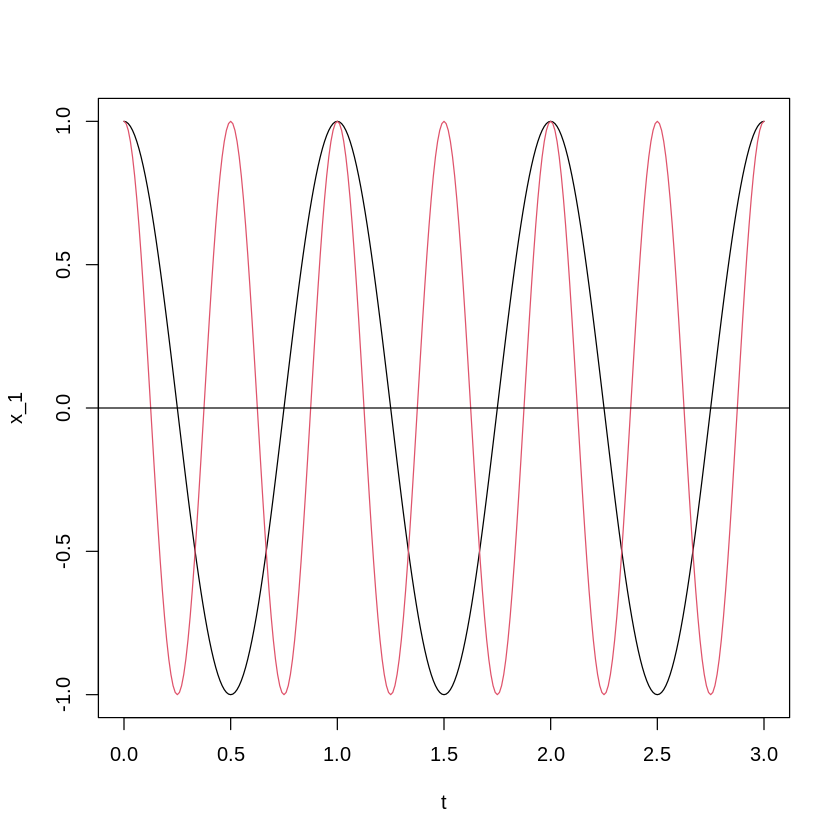

In [10]:
## Changing Frequency

R1 <- 1
f2 <- 2
Phi1 <- 0

x_2 <- R1 * cos(2*pi*f2 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

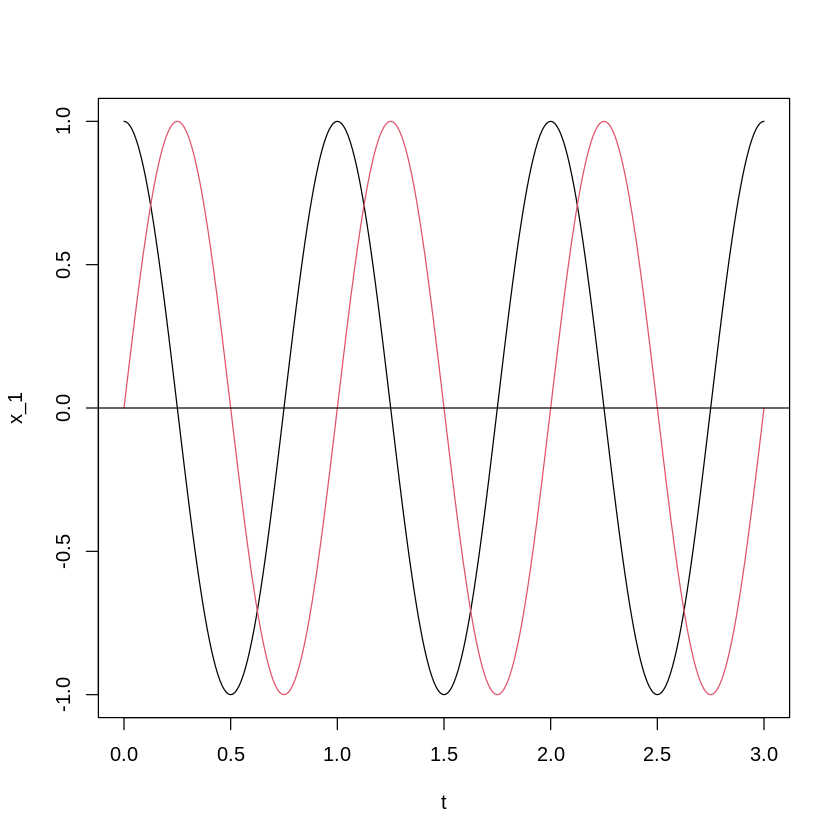

In [16]:
## Changing Phase

R1 <- 1
f1 <- 1
Phi2 <- -pi/2

x_2 <- R1 * cos(2*pi*f1 *t + Phi2 )

## this shift is equivalent to the sine function with similar amplitude and frequency due to sine and cosine being complementary (thus "co-"sine)

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

Note that the wave function above only works out for only one wave of which data often involves a sum of multiple waves at differing amplitudes, frequencies, and shifts, in addition to some randomness like a white noise process.

Using the example in TATSAIR (pp.151-152), let us plot the following waves that add up together to form a simulated data that is not that far off from what is seen from real data:

$$X_{1t} = \cos \left( 2\pi \times \frac{1}{30} \times t + \frac{\pi}{8}\right)$$

$$X_{2t} = 3 \cos \left( 2\pi \times \frac{1}{10} \times t + \frac{3 \pi}{8}\right)$$

$$X_{3t} = 5 \cos \left( 2\pi \times \frac{1}{5} \times t + \frac{5 \pi}{8}\right)$$

$$Z_t \sim N(0,1)$$

$$X_t = X_{1t} + X_{2t} + X_{3t} + Z_t$$



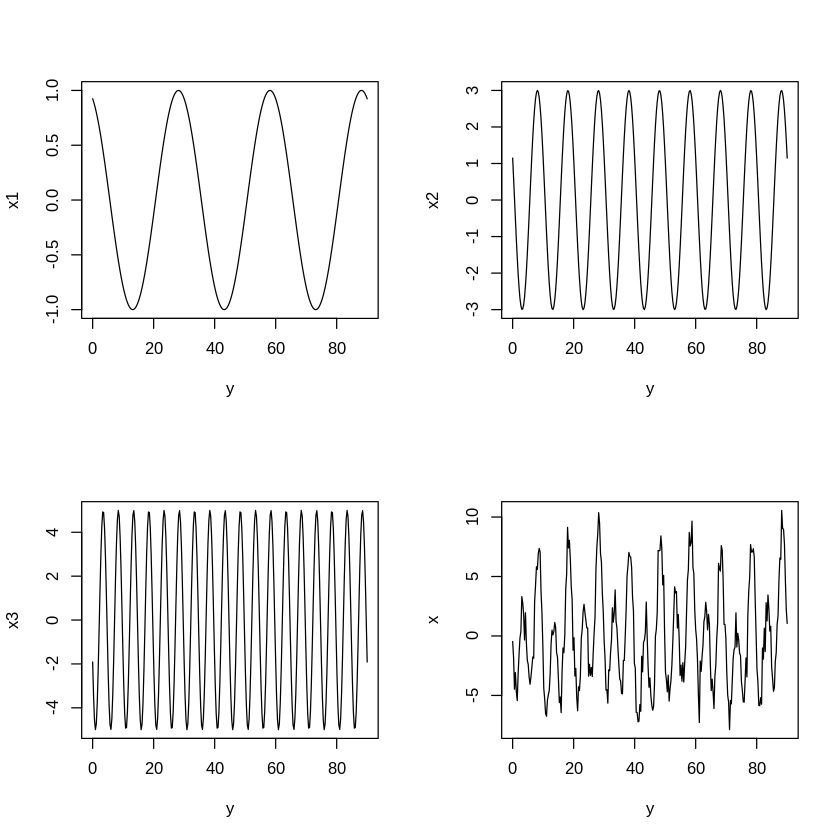

In [6]:
## Set Up Input
y<-seq(from = 0, to = 90, by = 0.3)

## Wave Components
x1<- 1*cos(2*pi*y*1/30 + pi/8)
x2<- 3*cos(2*pi*y*1/10 + 3*pi/8)
x3<- 5*cos(2*pi*y*1/5 + 5*pi/8)

## Set Seed for Normal White Noise
set.seed(1)
z<- rnorm(length(y), 0, 1)

## Summing UP Components
x<-x1+x2+x3+z

## Displaying Plots in a 2x2 setup
par(mfrow=c(2,2))

## Individual Wave Components and Simulated Data
plot(y, x1, type="l", xlab="y", ylab="x1")
plot(y, x2, type="l", xlab="y", ylab="x2")
plot(y, x3, type="l", xlab="y", ylab="x3")
plot(y, x, type="l", xlab="y", ylab="x")

Alternatively, we can express the same equation with the following equation (TSAAR):

$$x_t = R cos (2\pi  f  t +\Phi) = A \cos(2\pi ft) + B \sin(2\pi ft)$$

Where the two equations one-to-one transformations with

$$ R = \sqrt{A^2 + B^2} \quad , \quad \Phi = arctan (-B/A) $$

$$ A = R \cos(\Phi) \quad , \quad B = R \sin(\Phi) $$

With $arctan()$ being the arc tangent function defined with $\mathbb{R}$ as domain and itss range is $(-\pi/2, \pi/2)$.

In terms of statistical modeling, if we have data $y_t$ that we would like to fit a wave function with frequency $f$ as a known quantity before modeling, we can use $x_{1t} = \cos(2\pi ft)$ and $x_{2t} = \sin(2\pi ft)$ as independent variables with parameters $A$ and $B$ to be estimated by a model.

Using the example in TATSAIR, we can reexpress the components into this form:

$$X_{1t} = \cos \left( 2\pi \times \frac{1}{30} \times t + \frac{\pi}{8}\right) = \left[  \cos \left( \frac{\pi}{8} \right) \right] \cos \left( 2\pi \times \frac{1}{30} \times t \right) + \left[  \sin \left( \frac{\pi}{8} \right) \right] \sin \left( 2\pi \times \frac{1}{30} \times t \right) $$

$$X_{2t} = 3 \cos \left( 2\pi \times \frac{1}{10} \times t + \frac{3 \pi}{8}\right)$$

$$X_{3t} = 5 \cos \left( 2\pi \times \frac{1}{5} \times t + \frac{5 \pi}{8}\right)$$

$$Z_t \sim N(0,1)$$

$$X_t = X_{1t} + X_{2t} + X_{3t} + Z_t$$

## The Harmonic Regression Model

By the reexpression of the wave function into a pair of sin and cos functions for a given frequency, we can

# References:

(TATSAIR): Chatfield C & Xing H (2019).  The analysis of time series: an introduction with R, Seventh Ed. CRC Press.

(TSAAR): Cryer JD & Chan K-S (2008). Time Series Analysis With Applications in R, Second Edition. Springer Science+Business Media, LLC.

(TSDAAUR): Shumway RH & Stoffer DS (2019). Time series: a data analysis approach using R. CRC Press.